# The "Strain ellipse"
This notebook should illustrate, how you get from a unit circle to a strain ellipse. It is based on our findings in the "Strain Parameters" notebook.

In [1]:
from __future__ import division
from IPython.display import Image
from IPython.display import HTML
import math as m
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as pywid
import os,sys
%matplotlib inline

### Contents
1. [Meaning of "pure shear" and "simple shear"](#meaning)  
    1.1 [pure shear](#pure_shear)  
    1.2 [simple shear](#simple_shear)  
2. [Equations](#equations)
3. [Shearing a body](#shear_body)

<a id='meaning'></a>  
## Meaning of "pure shear" and "simple shear"  
Here, you will learn about the characteristics and differences between pure shear and simple shear.  

<a id='pure_shear'></a>  
### pure shear
Pure shear can also be called "flattening". It is a deformation, that can be represented by taking a square and shortening it parallel to one side while lengthening it parallel to the perpendicular side by the same amount. This means, that the area stays constant.  
<img src="pure_shear.png">  
Case B is actually redundant, as it is similar to case A with a rotated coordinate system. Here, swapping of x$_1$ and x$_2$ axis is required for performing case B.  

<a id='simple_shear'></a>
### simple shear
Simple shear is a two-dimensional, area-constant deformation, resembling the sliding of cards in a deck. The rectangular shape of the deck changes into a parallelogram. The internal orientation to the shear direction of lines is important. If a line (or layer) is orented parallel to the shear direction, the deformation has no influence on its length or thickness. The layer is not rotated either (brownish layer in the figure below).  
Layers that are cross-cut by the shear planes are either rotated and may be shortened and thickened, or lengthened and thinned, depending on their initial orientation (green layer).  
<img src="simple_shear.png">
Imagine instead of lines, there were a circle in the unsheared square. When sheared by simple shear, that circle would turn into an ellipse, wouldn't it?  

<a id='equations'></a>  
## Equations

Remember the deformation tensor / deformation matrix, you've learned about in the "Strain Parameters" notebook?  

$$ D=\left(\begin{array}{rr} D_{11} & D_{12} \\
D_{21} & D_{22}\end{array}\right)$$  

Using this tensor, we can model pure shear and simple shear. Above, we have described shear processes by a circle reshaping into an ellipse.  
A unit circle can be described by:

$$x^2 + y^2 = 1 $$  

Combining the equation for a unit circle with the deformation tensor, we achieve the equation for a strain ellipse:

$$ \bigg (\frac{D_{22}x' + D_{21}y'}{D_{11}D_{22} - D_{12}D_{21}} \bigg)^2 + \bigg (\frac{-D_{21}x' + D_{11}y'}{D_{11}D_{22} - D_{12}D_{21}} \bigg)^2 = 1$$

<a id='shear_body'></a>
## Shearing a body
below is the code transferring the stated equations.  
In the interactive figure, you can interactively set the parameters (D$_{11}$, D$_{12}$, D$_{21}$, and D$_{22}$) of your deformation tensor.  
Play around and see how it works!

In [43]:
def transform(D11,D12,D21,D22):
    # rectangle
    o_r = np.array([[-1,-1],[1,-1],[1,1],[-1,1],[-1,-1]])
    d_r = np.array([[D11*o_r[0,0]+D12*o_r[0,1],D21*o_r[0,0]+D22*o_r[0,1]],
                    [D11*o_r[1,0]+D12*o_r[1,1],D21*o_r[1,0]+D22*o_r[1,1]],
                    [D11*o_r[2,0]+D12*o_r[2,1],D21*o_r[2,0]+D22*o_r[2,1]],
                    [D11*o_r[3,0]+D12*o_r[3,1],D21*o_r[3,0]+D22*o_r[3,1]], 
                    [D11*o_r[4,0]+D12*o_r[4,1],D21*o_r[4,0]+D22*o_r[4,1]]])
    
    # circle, ellipse
    deg = np.linspace(0,360,360)
    r2d = np.pi/180.
    angle = deg*r2d
    circ = np.zeros([360,2])
    circ[:,0] = np.cos(angle)
    circ[:,1] = np.sin(angle)
    
    ell = np.zeros([360,2])
    ell[:,0] = circ[:,0]*D11 + circ[:,1]*D12
    ell[:,1] = circ[:,0]*D21 + circ[:,1]*D22
    
    # plot the figure
    fig = plt.figure(figsize=(10,10))
    plt.plot(o_r[:,0],o_r[:,1],'-',linewidth=2)
    plt.plot(d_r[:,0],d_r[:,1],'r-',linewidth=2)
    plt.plot(circ[:,0],circ[:,1],'-g',linewidth=1.3)
    plt.plot(ell[:,0],ell[:,1],'-c',linewidth=1.3)
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
    plt.xlabel("x$_1$",fontsize=20)
    plt.ylabel("x$_2$",fontsize=20)
    plt.grid()
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.gca().set_aspect('equal', adjustable='box')
    

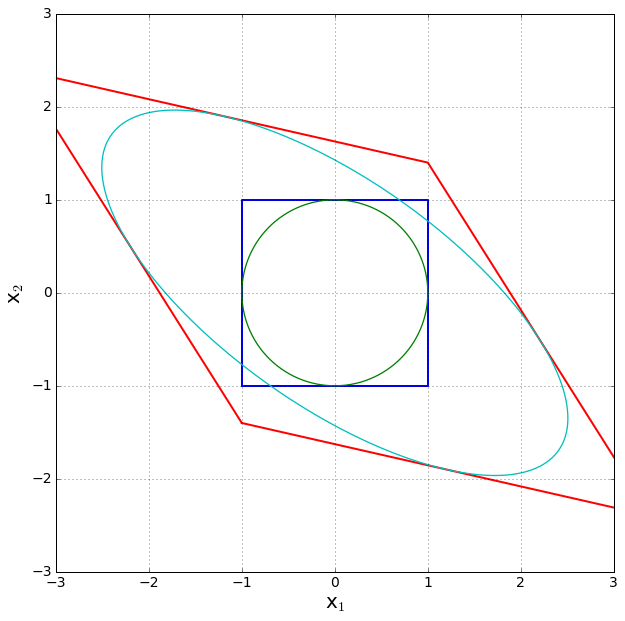

In [44]:
pywid.interact(transform,D11=(-3.,3.), D12=(-3.,3.), D21=(-3.,3.), D22=(-3.,3.))